# BOLLYWOOD BOX OFFICE ANALYSIS


### SOURCE: Kaggle
###### LINK : https://www.kaggle.com/datasets/sugandhkhobragade/bollywood-box-office-20172020?resource=download&select=bollywood_box_clean.csv

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r"C:\Users\Acer\ME\box_office.csv")

In [38]:
data.head(5)

,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_director,release_date,release_day,release_month,release_year,runtime,producer,banner,actors,movie_details
0,Angrezi Medium,4.03,9.03,9.36,9.36,13.50,"Drama, Comedy",Homi Adajania,"13 March, 2020",13,Mar,2020,145,"Dinesh Vijan , Jyoti Deshpande","Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor",When his daughter decides to further her studi...
1,Baaghi 3,17.50,53.83,90.67,93.37,137.00,Action,Ahmed Khan,"06 March, 2020",6,Mar,2020,147,Sajid Nadiadwala,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh",A man embarks on a bloody rampage to save his ...
2,Thappad,3.07,14.66,22.79,30.61,44.50,"Drama, Social",Anubhav Sinha,"28 February, 2020",28,Feb,2020,142,"Bhushan Kumar , Krishan Kumar, Anubhav Sinha","Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza",Thappad is a story of Amrita whose seemingly p...
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,62.78,86.39,"Comedy, Romance",Hitesh Kewalya,"21 February, 2020",21,Feb,2020,120,"Aanand L Rai , Himanshu Sharma, Bhushan Kumar","Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao",The road to achieving a happy ending is a litt...
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,31.97,40.94,Horror,Bhanu Pratap Singh,"21 February, 2020",21,Feb,2020,117,"Hiroo Johar , Karan Johar, Apoorva Mehta","Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana",A couple is trapped on an abandoned ship lying...


In [39]:
data.describe()

,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,release_day,release_year,runtime
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,8.753462,31.418923,48.153308,71.829769,108.331462,15.500000,2018.453846,136.692308
std,10.230670,32.925684,49.600669,78.639979,133.386554,8.628643,0.845522,16.649532
min,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,2017.000000,93.000000
25%,2.100000,8.182500,11.605000,14.027500,16.962500,8.000000,2018.000000,124.250000
50%,4.755000,18.240000,28.215000,36.900000,52.965000,15.000000,2018.000000,137.000000
75%,10.372500,42.220000,68.147500,100.120000,147.042500,22.750000,2019.000000,147.750000
max,53.350000,166.250000,238.350000,341.220000,585.000000,31.000000,2020.000000,175.000000


In [40]:
data.shape

(130, 17)

In [41]:
data.dtypes

movie_name                object
movie_opening            float64
movie_weekend            float64
movie_firstweek          float64
movie_total              float64
movie_total_worldwide    float64
movie_genre               object
movie_director            object
release_date              object
release_day                int64
release_month             object
release_year               int64
runtime                    int64
producer                  object
banner                    object
actors                    object
movie_details             object
dtype: object

In [42]:
data.isnull().sum()

movie_name                0
movie_opening             0
movie_weekend             0
movie_firstweek           0
movie_total               0
movie_total_worldwide     0
movie_genre               1
movie_director            0
release_date              0
release_day               0
release_month             0
release_year              0
runtime                   0
producer                  1
banner                    0
actors                    4
movie_details            11
dtype: int64

In [43]:
data = data.dropna()
data.isnull().sum()

movie_name               0
movie_opening            0
movie_weekend            0
movie_firstweek          0
movie_total              0
movie_total_worldwide    0
movie_genre              0
movie_director           0
release_date             0
release_day              0
release_month            0
release_year             0
runtime                  0
producer                 0
banner                   0
actors                   0
movie_details            0
dtype: int64

In [44]:
data.shape

(118, 17)

In [52]:
df=data.copy()

In [53]:
# Creating a dictionary with movie names and their respective budgets (in crore INR)
movie_budgets = {
    "Angrezi Medium": 36, "Baaghi 3": 85, "Thappad": 30, "Shubh Mangal Zyada Saavdhan": 60,
    "Bhoot: Part One - The Haunted Ship": 30, "Love Aaj Kal": 40, "Malang": 60, "Shikara": 15,
    "Jawaani Jaaneman": 40, "Panga": 25, "Street Dancer 3D": 100, "Tanhaji: The Unsung Warrior": 125,
    "Chhapaak": 35, "Good Newwz": 60, "Dabangg 3": 100, "Mardaani 2": 25, "Pati Patni Aur Woh": 30,
    "Panipat": 92, "Commando 3": 35, "Marjaavaan": 38, "Bala": 27, "Ujda Chaman": 10,
    "Housefull 4": 75, "Saand Ki Aankh": 30, "The Sky Is Pink": 24, "Sye Raa Narasimha Reddy": 200,
    "War": 200, "Pal Pal Dil Ke Paas": 60, "Section 375": 20, "Dream Girl": 30, "Chhichhore": 50,
    "Saaho": 350, "Batla House": 47, "Mission Mangal": 32, "Jabariya Jodi": 29, "Judgemental Hai Kya": 35,
    "Super 30": 115, "Article 15": 30, "Kabir Singh": 60, "Game Over": 30, "Bharat": 100,
    "PM Narendra Modi": 8, "India's Most Wanted": 18, "De De Pyaar De": 75, "Student Of The Year 2": 65,
    "Blank": 20, "Kalank": 150, "The Tashkent Files": 8, "Romeo Akbar Walter": 35, "Junglee": 45,
    "Kesari": 80, "Badla": 10, "Luka Chuppi": 25, "Sonchiriya": 30, "Total Dhamaal": 100,
    "Gully Boy": 84, "Amavas": 10, "Ek Ladki Ko Dekha Toh Aisa Laga": 30, "Manikarnika: The Queen Of Jhansi": 125,
    "Thackeray": 30, "Why Cheat India": 27, "The Accidental Prime Minister": 30, "Uri: The Surgical Strike": 45,
    "Simmba": 80, "KGF": 80, "Zero": 200, "Kedarnath": 60, "2": 550, "Bhaiaji Superhittt": 30,
    "Pihu": 2, "Mohalla Assi": 8, "Thugs Of Hindostan": 300, "Baazaar": 30, "Badhaai Ho": 29,
    "Tumbbad": 50, "AndhaDhun": 32
}

# Map the budget values to the movie names in the dataframe
df['budget'] = df['movie_name'].map(movie_budgets)

# Save the updated dataframe back to the CSV file
df.to_csv('movies_dataset_with_budget.csv', index=False)



In [54]:
# Creating a dictionary with movie names and their respective IMDb ratings
imdb_ratings = {
    "Angrezi Medium": 7.3, "Baaghi 3": 2.1, "Thappad": 7.9, "Shubh Mangal Zyada Saavdhan": 5.9,
    "Bhoot: Part One - The Haunted Ship": 5.4, "Love Aaj Kal": 4.7, "Malang": 6.5, "Shikara": 7.2,
    "Jawaani Jaaneman": 6.6, "Panga": 6.8, "Street Dancer 3D": 3.6, "Tanhaji: The Unsung Warrior": 7.6,
    "Chhapaak": 5.0, "Good Newwz": 7.0, "Dabangg 3": 3.2, "Mardaani 2": 7.4, "Pati Patni Aur Woh": 5.7,
    "Panipat": 5.3, "Commando 3": 5.6, "Marjaavaan": 3.5, "Bala": 7.3, "Ujda Chaman": 6.6,
    "Housefull 4": 3.5, "Saand Ki Aankh": 7.7, "The Sky Is Pink": 7.6, "Sye Raa Narasimha Reddy": 7.4,
    "War": 6.5, "Pal Pal Dil Ke Paas": 4.6, "Section 375": 8.1, "Dream Girl": 7.0, "Chhichhore": 8.2,
    "Saaho": 5.3, "Batla House": 7.2, "Mission Mangal": 6.5, "Jabariya Jodi": 3.5, "Judgemental Hai Kya": 6.0,
    "Super 30": 8.0, "Article 15": 8.2, "Kabir Singh": 7.1, "Game Over": 7.1, "Bharat": 4.9,
    "PM Narendra Modi": 3.1, "India's Most Wanted": 4.5, "De De Pyaar De": 6.6, "Student Of The Year 2": 2.3,
    "Blank": 6.0, "Kalank": 3.6, "The Tashkent Files": 8.0, "Romeo Akbar Walter": 6.5, "Junglee": 5.4,
    "Kesari": 7.4, "Badla": 7.8, "Luka Chuppi": 6.3, "Sonchiriya": 7.9, "Total Dhamaal": 4.3,
    "Gully Boy": 8.0, "Amavas": 3.0, "Ek Ladki Ko Dekha Toh Aisa Laga": 5.6, "Manikarnika: The Queen Of Jhansi": 6.4,
    "Thackeray": 5.2, "Why Cheat India": 6.0, "The Accidental Prime Minister": 6.1, "Uri: The Surgical Strike": 8.2,
    "Simmba": 6.2, "KGF": 8.2, "Zero": 5.4, "Kedarnath": 6.9, "2": 6.4, "Bhaiaji Superhittt": 4.1,
    "Pihu": 6.7, "Mohalla Assi": 6.4, "Thugs Of Hindostan": 4.0, "Baazaar": 6.6, "Badhaai Ho": 8.0,
    "Tumbbad": 8.3, "AndhaDhun": 8.2
}

# Map the IMDb ratings to the movie names in the dataframe
df['imdb_rating'] = df['movie_name'].map(imdb_ratings)

# Save the updated dataframe back to the CSV file
df.to_csv('movies_dataset_with_imdb.csv', index=False)



<Axes: >

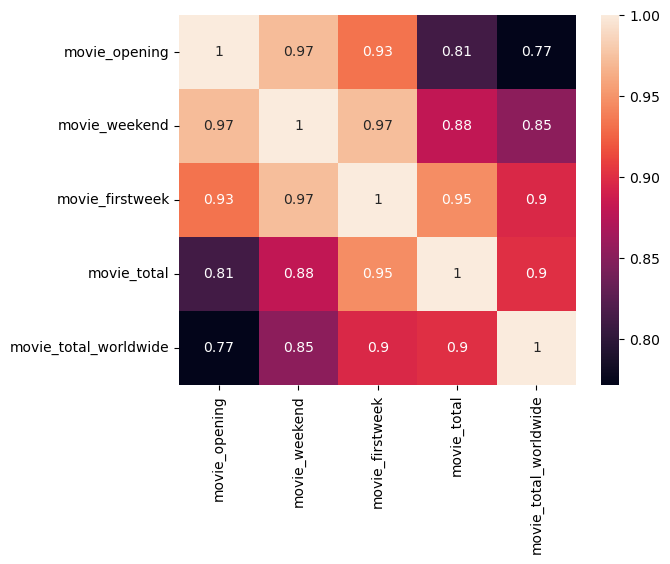

In [55]:
import seaborn as sns
corr = df[['movie_opening','movie_weekend', 'movie_firstweek', 'movie_total','movie_total_worldwide']].corr()
sns.heatmap(corr, annot=True)

### Q1: Top 10 All-Time Gross Collections Movies

Top 10 All-Time Gross Collections Movies:

                      movie_name  movie_total_worldwide
109                    Padmaavat                 585.00
90                         Sanju                 579.00
113              Tiger Zinda Hai                 558.00
121             Secret Superstar                 547.00
67                             2                 520.00
26                           War                 455.00
31                         Saaho                 424.00
38                   Kabir Singh                 369.58
11   Tanhaji: The Unsung Warrior                 341.00
63                        Simmba                 317.61


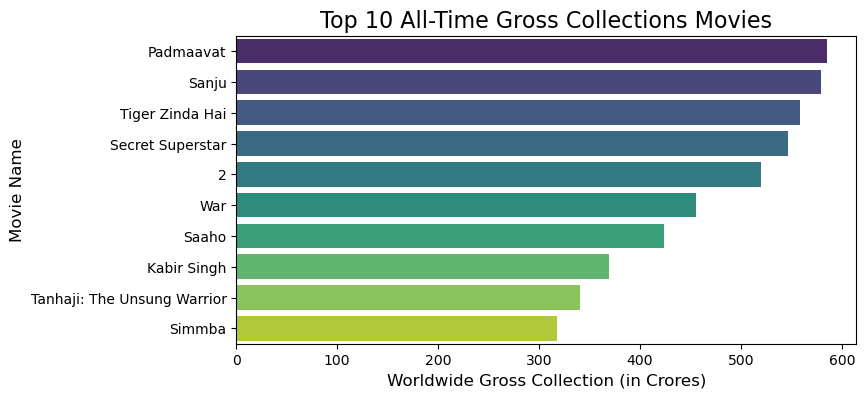

In [77]:
top_10_gross = data.sort_values(by='movie_total_worldwide', ascending=False).head(10)
print("Top 10 All-Time Gross Collections Movies:\n")
print(top_10_gross[['movie_name', 'movie_total_worldwide']])

plt.figure(figsize=(8, 4))
sns.barplot(x='movie_total_worldwide', y='movie_name', data=top_10_gross, palette='viridis')

plt.title('Top 10 All-Time Gross Collections Movies', fontsize=16)
plt.xlabel('Worldwide Gross Collection (in Crores)', fontsize=12)
plt.ylabel('Movie Name', fontsize=12)

# Display the plot
plt.show()

### Q2: Top 10 Big Budget Movies All Time 

In [78]:
top_10_budget = df.sort_values(by='budget', ascending=False).head(10)
print("\nTop 10 Big Budget Movies All Time:")
print(top_10_budget[['movie_name', 'budget']])


Top 10 Big Budget Movies All Time:
                          movie_name  budget
67                                 2   550.0
31                             Saaho   350.0
71                Thugs Of Hindostan   300.0
65                              Zero   200.0
26                               War   200.0
25           Sye Raa Narasimha Reddy   200.0
46                            Kalank   150.0
58  Manikarnika: The Queen Of Jhansi   125.0
11       Tanhaji: The Unsung Warrior   125.0
36                          Super 30   115.0


### Q3: Top 5 Grosser of Shahrukh Khan Movies


In [79]:

srk_movies = df[df['actors'].str.contains("Shahrukh Khan", case=False, na=False)]
top_5_srk = srk_movies.sort_values(by='movie_total_worldwide', ascending=False).head(5)
print("\nTop 5 Grosser of Shahrukh Khan Movies:")
print(top_5_srk[['movie_name', 'movie_total_worldwide']])


Top 5 Grosser of Shahrukh Khan Movies:
Empty DataFrame
Columns: [movie_name, movie_total_worldwide]
Index: []


### Q4: Top 5 Grosser of Aamir Khan Movies

In [80]:


aamir_movies = df[df['actors'].str.contains("Aamir Khan", case=False, na=False)]
top_5_aamir = aamir_movies.sort_values(by='movie_total_worldwide', ascending=False).head(5)
print("\nTop 5 Grosser of Aamir Khan Movies:")
print(top_5_aamir[['movie_name', 'movie_total_worldwide']])




Top 5 Grosser of Aamir Khan Movies:
            movie_name  movie_total_worldwide
71  Thugs Of Hindostan                 251.84


### Q5: Top 5 Grosser of Salman Khan Movies

In [81]:

# Handling NaN values in the 'actors' column with na=False
salman_movies = df[df['actors'].str.contains("Salman Khan", case=False, na=False)]

# Sorting by 'movie_total_worldwide' and selecting the top 5 grossing movies
top_5_salman = salman_movies.sort_values(by='movie_total_worldwide', ascending=False).head(5)

# Displaying the top 5 Salman Khan movies
print("\nTop 5 Grosser of Salman Khan Movies:")
print(top_5_salman[['movie_name', 'movie_total_worldwide']])



Top 5 Grosser of Salman Khan Movies:
          movie_name  movie_total_worldwide
113  Tiger Zinda Hai                 558.00
40            Bharat                 314.68
91            Race 3                 300.04
14         Dabangg 3                 212.87


### Q6: Highest Grosser of Each Year Since Last Ten Years

In [82]:

last_10_years = df[df['release_year'] >= (df['release_year'].max() - 10)]
highest_gross_year = last_10_years.groupby('release_year').apply(lambda x: x.loc[x['movie_total_worldwide'].idxmax()])
print("\nHighest Grosser of Each Year Since Last Ten Years:")
print(highest_gross_year[['movie_name', 'release_year', 'movie_total_worldwide']])



Highest Grosser of Each Year Since Last Ten Years:
                               movie_name  release_year  movie_total_worldwide
release_year                                                                  
2017                      Tiger Zinda Hai          2017                  558.0
2018                            Padmaavat          2018                  585.0
2019                                  War          2019                  455.0
2020          Tanhaji: The Unsung Warrior          2020                  341.0


### Q7: Top 5 Movies with Minimum Budget but More Profit 

In [83]:

df['profit'] = df['movie_total_worldwide'] - df['budget']
min_budget_more_profit = df.sort_values(by=['budget', 'profit'], ascending=[True, False]).head(5)
print("\nTop 5 Movies with Minimum Budget but More Profit:")
print(min_budget_more_profit[['movie_name', 'budget', 'profit']])


Top 5 Movies with Minimum Budget but More Profit:
            movie_name  budget  profit
69                Pihu     2.0   -2.00
41    PM Narendra Modi     8.0   15.00
47  The Tashkent Files     8.0   -8.00
70        Mohalla Assi     8.0   -8.00
51               Badla    10.0  120.12


### Q8: Top 10 Movies IMDb  

In [84]:

top_10_imdb = df.sort_values(by='imdb_rating', ascending=False).head(10)
print("\nTop 10 Movies by IMDb Rating:")
print(top_10_imdb[['movie_name', 'imdb_rating']])




Top 10 Movies by IMDb Rating:
                  movie_name  imdb_rating
74                   Tumbbad          8.3
37                Article 15          8.2
30                Chhichhore          8.2
64                       KGF          8.2
62  Uri: The Surgical Strike          8.2
28               Section 375          8.1
36                  Super 30          8.0
47        The Tashkent Files          8.0
55                 Gully Boy          8.0
73                Badhaai Ho          8.0


### Q9: Which Movie Genre has More Box Office Collections 

In [89]:
df['movie_genre'] = df['movie_genre'].str.split(',')
genre_collections = df.explode('movie_genre').groupby('movie_genre')['movie_total_worldwide'].sum().sort_values(ascending=False)
print("\nMovie Genre with More Box Office Collections:")
print(genre_collections.head(1))


Movie Genre with More Box Office Collections:
Series([], Name: movie_total_worldwide, dtype: float64)


### Q10: Which Movie Genre has Less Box Office Collections 

In [70]:
print("\nMovie Genre with Less Box Office Collections:")
print(genre_collections.tail(1))


Movie Genre with Less Box Office Collections:
movie_genre
 Mystery    0.0
Name: movie_total_worldwide, dtype: float64
